In [1]:
from time import time
from src.data_structures import *
from src.trapezoidal_map import *
from src.utils import *
from src.visualizer import *
import matplotlib.pyplot

In [4]:
import matplotlib.pyplot as plt
%matplotlib tk
mouse_points = []

def add_sections(event):
    x, y = event.xdata, event.ydata

    if x is not None and y is not None:
        if event.button == 1:
            mouse_points.append((x, y))
            plt.plot(x, y, "go")
            if len(mouse_points) % 2 == 0 and len(mouse_points) > 0:
                plt.plot([mouse_points[-2][0], mouse_points[-1][0]], [mouse_points[-2][1], mouse_points[-1][1]], 'b-')

            plt.draw()
        elif event.button == 3:
            plt.close()


fig, ax = plt.subplots()
ax.set_title("Left click to add points, right click to close the plot")

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

fig.canvas.mpl_connect('button_press_event', add_sections)

plt.show()

[((5.241935483870968, 80.6818181818182), (68.54838709677419, 82.03463203463205)), ((11.89516129032258, 54.978354978354986), (79.43548387096774, 50.64935064935065)), ((12.903225806451612, 24.675324675324678), (69.95967741935483, 21.428571428571434)), ((9.879032258064516, 66.8831168831169), (79.43548387096774, 65.53030303030305)), ((81.65322580645162, 92.85714285714288), (93.34677419354838, 13.311688311688314)), ((27.620967741935484, 35.49783549783551), (58.46774193548387, 32.52164502164503))]


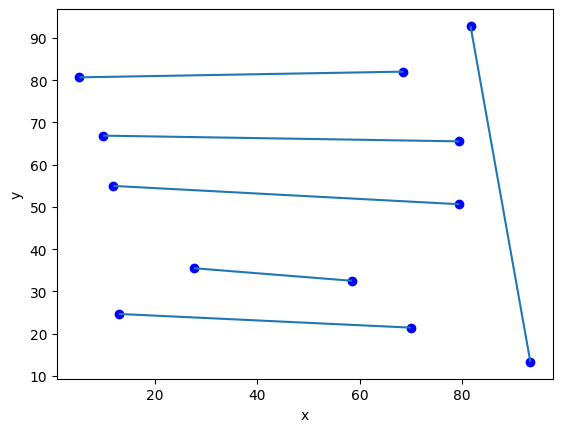

In [7]:
%matplotlib inline

lines = []
for i in range(0, len(mouse_points) - 1, 2):
    x1, x2 = mouse_points[i][0], mouse_points[i + 1][0]
    if x1 < x2:
        lines.append((mouse_points[i], mouse_points[i + 1]))
    else:
        lines.append((mouse_points[i + 1], mouse_points[i]))

vis = Visualizer()
vis.add_line_segment(lines)
for line in lines:
    vis.add_point(line[0], color="blue")
    vis.add_point(line[1], color="blue")

vis.show()
print(lines)

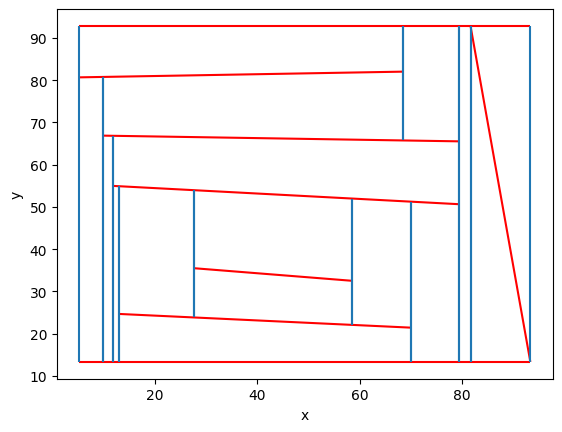

In [8]:
tm = TrapezoidalMap(lines)
tm.update_visualizer = True
tm.build_trapezoidal_map()
vis = tm.vis
vis.save_gif()
vis.show()

Czas budowania mapy trapezowej dla 100000 odcinków: 13.7825 s


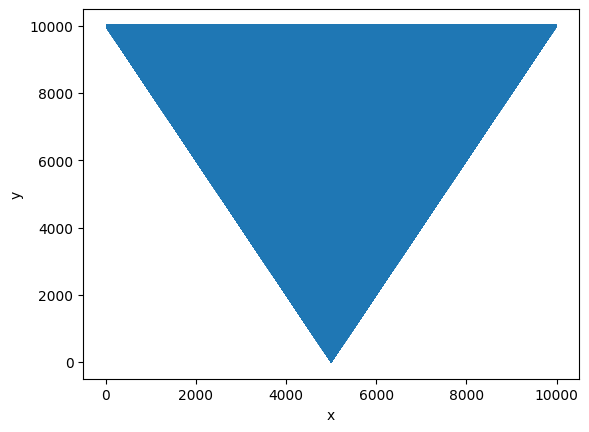

In [9]:
sizes = [100000]
import sys
sys.setrecursionlimit(1000000)
for size in sizes:
    generated_segments = generateParallelSegments(10000, 10000, size-2)
    vis = Visualizer()
    vis.add_line_segment(generated_segments)
    vis.show()
    t1 = time()
    T = TrapezoidalMap(generated_segments)
    T.update_visualizer = False
    T.build_trapezoidal_map()
    t2 = time()
    print("Czas budowania mapy trapezowej dla", size, "odcinków: {ex_time:.4f} s".format(ex_time = t2 - t1))